In [1]:
# imporing and reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DF = pd.read_csv(r"C:\Users\gorja\Downloads\wfp_food_prices_ken.csv")
DF

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.0,0.07
15992,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,aggregate,Retail,KES,138.46,0.9696
15993,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,oil and fats,Oil (vegetable),L,aggregate,Retail,KES,259.23,1.8153
15994,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,pulses and nuts,Beans (dry),KG,aggregate,Retail,KES,191.67,1.3422


In [4]:
#columns and their data structure
DF.dtypes

date         object
admin1       object
admin2       object
market       object
latitude     object
longitude    object
category     object
commodity    object
unit         object
priceflag    object
pricetype    object
currency     object
price        object
usdprice     object
dtype: object

In [6]:
#cleaning data and copying it to new csv file
DF = DF.dropna()
Kenya_DF = DF[['date', 'admin2', 'market', 'category', 'commodity', 'pricetype','price']]
Kenya_DF.to_csv('Cleaned_Kenya_DF.csv', index = False)

In [8]:
#reading the cleaned data
New_df = pd.read_csv(r"C:\Users\gorja\OneDrive\Documents\Desktop\Test\Cleaned_Kenya_DF.csv")
New_df

,date,admin2,market,category,commodity,pricetype,price
0,#date,#adm2+name,#loc+market+name,#item+type,#item+name,#item+price+type,#value
1,2006-01-15,Mombasa,Mombasa,cereals and tubers,Maize,Wholesale,16.13
2,2006-01-15,Mombasa,Mombasa,cereals and tubers,Maize (white),Wholesale,1480.0
3,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans,Wholesale,33.63
4,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans (dry),Wholesale,3246.0
...,...,...,...,...,...,...,...
15991,2023-08-15,Garissa,Dagahaley (Daadab),miscellaneous food,Salt,Retail,10.0
15992,2023-08-15,Garissa,Dagahaley (Daadab),miscellaneous food,Sugar,Retail,138.46
15993,2023-08-15,Garissa,Dagahaley (Daadab),oil and fats,Oil (vegetable),Retail,259.23
15994,2023-08-15,Garissa,Dagahaley (Daadab),pulses and nuts,Beans (dry),Retail,191.67


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from datetime import datetime

# Assuming 'New_df' is your DataFrame
New_df = New_df.iloc[1:]

# Changing the date column to date
New_df['date'] = pd.to_datetime(New_df['date'])
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# confirming data types
New_df.dtypes



date         datetime64[ns]
admin2               object
market               object
category             object
commodity            object
pricetype            object
price               float64
year                  int32
dtype: object

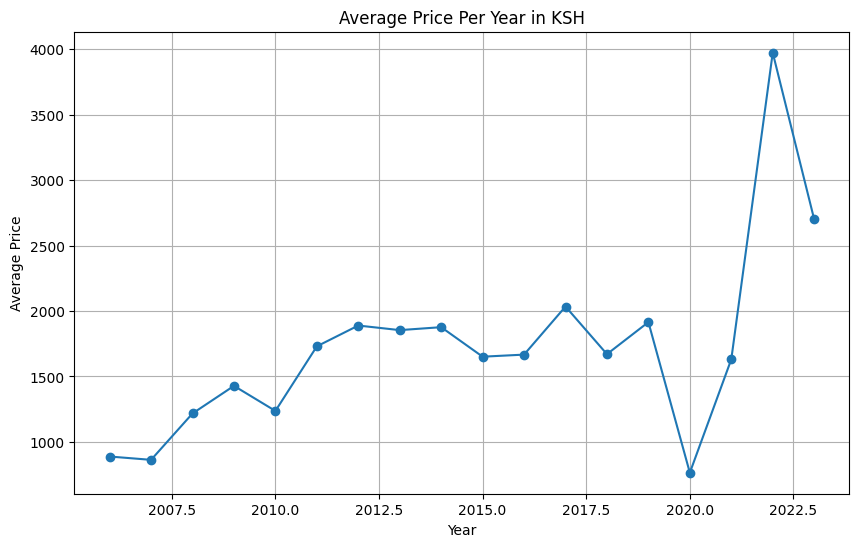

In [24]:
#confirming import matplotlib.pyplot as plt

# Assuming 'New_df' is your DataFrame
# Make sure 'date' column is of datetime type
New_df['year'] = New_df['date'].dt.year
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')


# Calculate average price per year
average_price_per_year = New_df.groupby('year')['price'].mean()

# Plotting as a line chart
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year.index, average_price_per_year, marker='o', linestyle='-')
plt.title('Average Price Per Year in KSH')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


    year        price
0   2006   887.520028
1   2007   862.127703
2   2008  1216.740791
3   2009  1427.703663
4   2010  1236.044778
5   2011  1729.829876
6   2012  1888.882969
7   2013  1853.849112
8   2014  1876.379438
9   2015  1650.702293
10  2016  1666.571882
11  2017  2033.998214
12  2018  1670.028037
13  2019  1914.984222
14  2020   763.683028
15  2021  1630.414201
16  2022  3974.492761


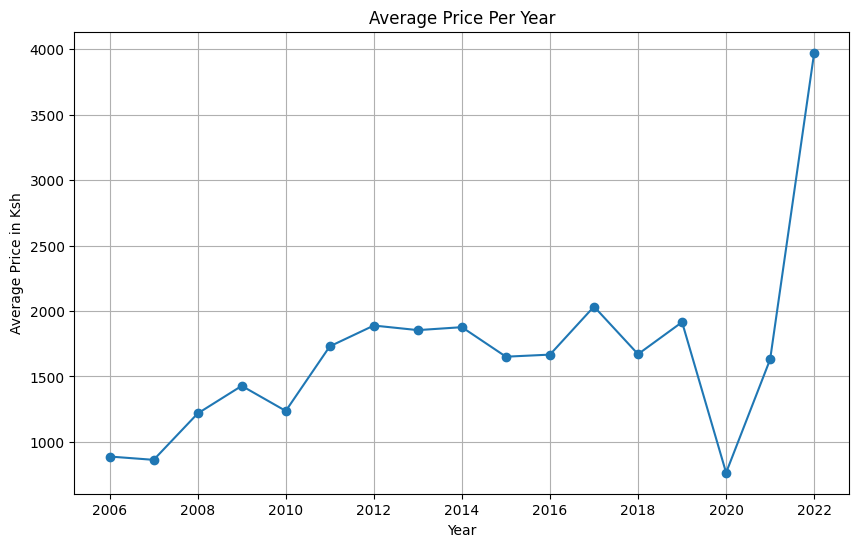

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'New_df' is your DataFrame
# Make sure 'date' column is of datetime type
New_df['year'] = New_df['date'].dt.year

# Filter data up to the year 2022
filtered_df = New_df[New_df['year'] <= 2022]

# Calculate average price per year
average_price_per_year = filtered_df.groupby('year')['price'].mean().reset_index()

# Display the table
print(average_price_per_year)

# Plotting as a line chart
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year['year'], average_price_per_year['price'], marker='o', linestyle='-')
plt.title('Average Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price in Ksh')
plt.grid(True)
plt.show()


In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'New_df' is your DataFrame
# Make sure 'date' column is of datetime type
New_df['year'] = New_df['date'].dt.year

# Filter data up to the year 2022
filtered_df = New_df[New_df['year'] == 2022]

# Calculate average price per year
average_price_per_year = filtered_df.groupby(['year','admin2'])['price'].mean().reset_index()

# Display the table
print(average_price_per_year)




    year       admin2        price
0   2022      Baringo  4264.862115
1   2022      Garissa  4451.594304
2   2022      Kajiado  3785.400000
3   2022       Kisumu  6901.513364
4   2022     Machakos  5136.270259
5   2022      Makueni  3559.987818
6   2022      Mandera  6053.673250
7   2022     Marsabit   177.664286
8   2022   Meru South  5134.338218
9   2022      Mombasa  3651.325313
10  2022      Nairobi  3881.363180
11  2022       Nakuru  5243.095714
12  2022        Nyeri  3713.177558
13  2022      Turkana   140.529163
14  2022  Uasin Gishu  5142.861475
15  2022        Wajir   163.056000
16  2022   West Pokot  4471.057933


    year       admin2        price
3   2022       Kisumu  6901.513364
6   2022      Mandera  6053.673250
11  2022       Nakuru  5243.095714
14  2022  Uasin Gishu  5142.861475
4   2022     Machakos  5136.270259
8   2022   Meru South  5134.338218
16  2022   West Pokot  4471.057933
1   2022      Garissa  4451.594304
0   2022      Baringo  4264.862115
10  2022      Nairobi  3881.363180


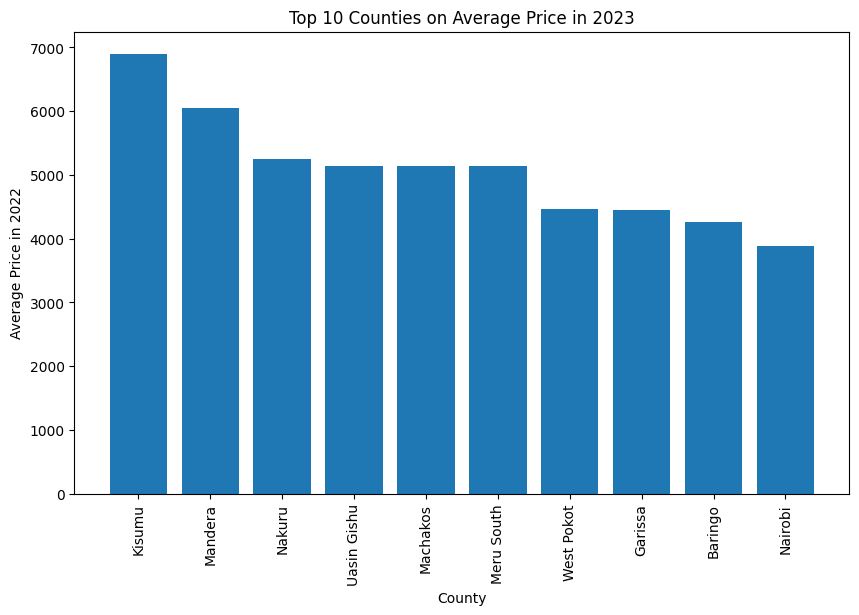

In [118]:
# now top 10 counties by average price
# Sort the DataFrame by 'price' in descending order and print the top 20
top_20_max_prices = average_price_per_year.sort_values(by='price', ascending=False).head(10)
print(top_20_max_prices)


#plotting a bar graph
x = top_20_max_prices['admin2']
y = top_20_max_prices['price']

plt.figure(figsize=(10, 6))
plt.title('Top 10 Counties on Average Price in 2023')
plt.xlabel('County')
plt.ylabel('Average Price in 2022')
plt.legend
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()



<Figure size 1000x600 with 0 Axes>

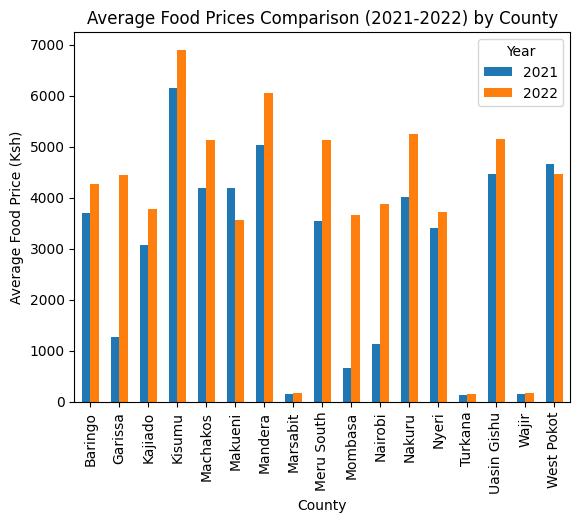

year                2021         2022  price_difference
admin2                                                 
Baringo      3693.191304  4264.862115        571.670811
Garissa      1264.656507  4451.594304       3186.937797
Kajiado      3060.888889  3785.400000        724.511111
Kisumu       6148.165678  6901.513364        753.347687
Machakos     4184.603655  5136.270259        951.666603
Makueni      4195.464862  3559.987818       -635.477044
Mandera      5031.966667  6053.673250       1021.706583
Marsabit      141.916667   177.664286         35.747619
Meru South   3533.533364  5134.338218       1600.804854
Mombasa       656.066009  3651.325313       2995.259303
Nairobi      1132.807692  3881.363180       2748.555488
Nakuru       4005.330061  5243.095714       1237.765654
Nyeri        3402.162277  3713.177558        311.015281
Turkana       131.121547   140.529163          9.407617
Uasin Gishu  4464.401429  5142.861475        678.460047
Wajir         147.085102   163.056000         15

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year and create a new column 'year'
New_df['year'] = New_df['date'].dt.year

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price'])

# Filter data for the years 2021 and 2022
df_2021_2022 = New_df[New_df['year'].isin([2021, 2022])]


# Group data by county and calculate the average price for each year
avg_prices = df_2021_2022.groupby(['admin2', 'year'])['price'].mean().reset_index()

# Pivot the data for better visualization
pivot_prices = avg_prices.pivot(index='admin2', columns='year', values='price')
pivot_prices = pivot_prices.dropna()

# Plotting the comparative bar graph
plt.figure(figsize=(10, 6))
pivot_prices.plot.bar(rot=0, width=0.6)
plt.title('Average Food Prices Comparison (2021-2022) by County')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.legend(title='Year', bbox_to_anchor=(1, 1))

plt.xticks(rotation='vertical')
#plt.tight_layout()
plt.show()




#printing table
pivot_prices['price_difference'] = pivot_prices[2022] - pivot_prices[2021]
print(pivot_prices)


year              2021         2022
month                              
April      5653.666667  7427.388889
August     4207.900000  7087.074000
December   7017.600000  3722.000000
February   3864.000000  6237.740000
January            NaN  6748.250000
July       6391.611111  7198.800000
June       6197.222222  7454.611111
March      5693.352941  6878.020000
May        6374.333333  6579.294444
November   7539.896429  7842.714286
October            NaN  7269.544444
September          NaN  6928.977778


<Figure size 1200x600 with 0 Axes>

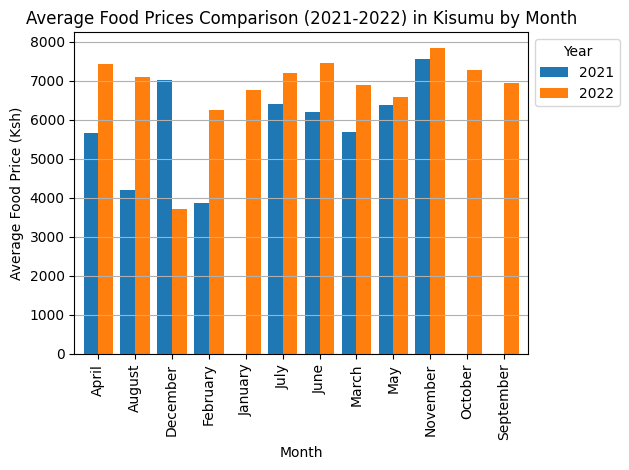

In [70]:
#Uncover and analyze any noticeable seasonal patterns in food prices in the leading county Kisumu
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year
New_df['month'] = New_df['date'].dt.month_name()

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price'])

# Filter data for Kisumu and the years 2021 and 2022
df_kisumu = New_df[(New_df['admin2'] == 'Kisumu') & New_df['year'].isin([2021, 2022])]

# Group data by month and calculate the average price for each year
avg_prices_kisumu = df_kisumu.groupby(['month', 'year'])['price'].mean().reset_index()

# Pivot the data for better visualization
pivot_prices_kisumu = avg_prices_kisumu.pivot(index='month', columns='year', values='price')

# Print the DataFrame with 2021 and 2022 data for Kisumu
print(pivot_prices_kisumu)

# Plotting the comparative bar graph for Kisumu with price difference
plt.figure(figsize=(12, 6))
pivot_prices_kisumu.plot.bar(rot=0, width=0.8)
plt.title('Average Food Prices Comparison (2021-2022) in Kisumu by Month')
plt.xlabel('Month')
plt.ylabel('Average Food Price (Ksh)')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()



year              2021         2022
month                              
April      5653.666667  7427.388889
August     4207.900000  7087.074000
December   7017.600000  3722.000000
February   3864.000000  6237.740000
January            NaN  6748.250000
July       6391.611111  7198.800000
June       6197.222222  7454.611111
March      5693.352941  6878.020000
May        6374.333333  6579.294444
November   7539.896429  7842.714286
October            NaN  7269.544444
September          NaN  6928.977778


<Figure size 1200x600 with 0 Axes>

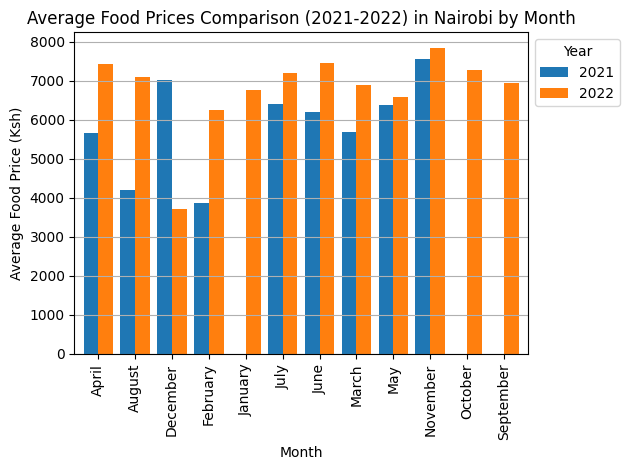

In [71]:
#Uncover and analyze any noticeable seasonal patterns in food prices in the capital county Nairobi
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year
New_df['month'] = New_df['date'].dt.month_name()

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price'])

# Filter data for Kisumu and the years 2021 and 2022
df_nairobi = New_df[(New_df['admin2'] == 'Nairobi') & New_df['year'].isin([2021, 2022])]

# Group data by month and calculate the average price for each year
avg_prices_nairobi = df_nairobi.groupby(['month', 'year'])['price'].mean().reset_index()

# Pivot the data for better visualization
pivot_prices_nairobi = avg_prices_nairobi.pivot(index='month', columns='year', values='price')

# Print the DataFrame with 2021 and 2022 data for Nairobi
print(pivot_prices_kisumu)

# Plotting the comparative bar graph for Nairobi with price difference
plt.figure(figsize=(12, 6))
pivot_prices_kisumu.plot.bar(rot=0, width=0.8)
plt.title('Average Food Prices Comparison (2021-2022) in Nairobi by Month')
plt.xlabel('Month')
plt.ylabel('Average Food Price (Ksh)')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()



year                          2022
category                          
pulses and nuts        9166.031778
cereals and tubers     3260.910000
vegetables and fruits  2205.475198
meat, fish and eggs     471.310408
oil and fats            264.854750
milk and dairy           70.607105
miscellaneous food       69.471250


<Figure size 1200x600 with 0 Axes>

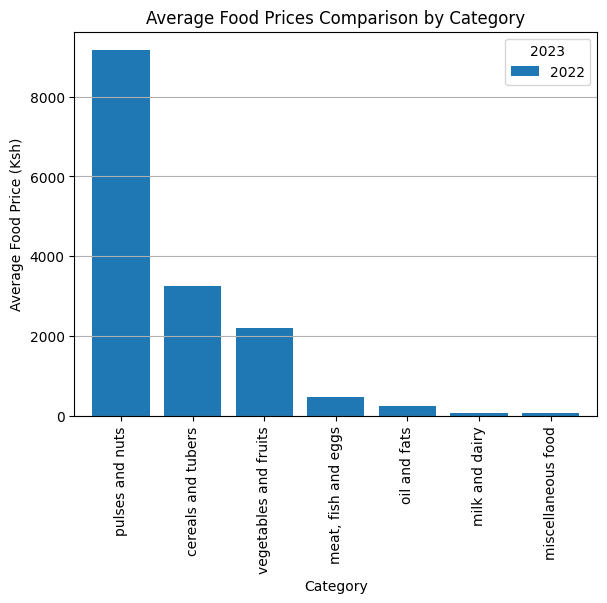

In [128]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Filter data up to the year 2022
filtered_df = New_df[New_df['year'] == 2022]

# Drop rows with missing values
filtered_df = filtered_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Group data by category, year, and calculate the average price
avg_prices_category = filtered_df.groupby(['category', 'year'])['price'].mean().reset_index()

# Pivot the data for better visualization
pivot_prices_category = avg_prices_category.pivot(index='category', columns='year', values='price')

# Sort values within each category by price in descending order
pivot_prices_category = pivot_prices_category.sort_values(by=2022, ascending=False)

# Print the DataFrame with average prices per year by category
print(pivot_prices_category)

# Plotting the bar graph for average prices per year by category
plt.figure(figsize=(12, 6))
pivot_prices_category.plot.bar(rot=0, width=0.8)
plt.title('Average Food Prices Comparison by Category')
plt.xlabel('Category')
plt.ylabel('Average Food Price (Ksh)')
plt.legend(title=2023, bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation='vertical')  # Corrected parameter
plt.show()


         admin2         price
9       Mombasa  12319.875000
3        Kisumu  11674.665000
14  Uasin Gishu  11366.560345
6       Mandera  10507.975000
8    Meru South   9995.407407


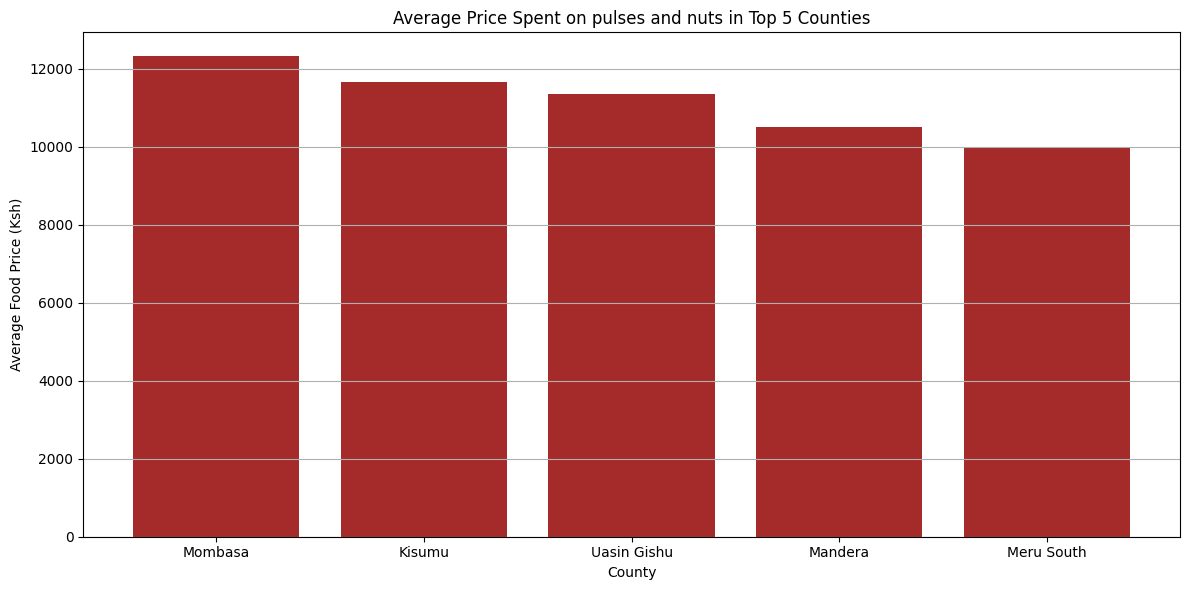

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'pulses and nuts' and the year 2022
pulses_nuts = New_df[(New_df['category'] == 'pulses and nuts') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = pulses_nuts.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'pulses and nuts' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'pulses and nuts' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='brown')
plt.title('Average Price Spent on pulses and nuts in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


     admin2      price
2  Marsabit  85.556667
4   Turkana  70.722778
0   Baringo  65.000000
5     Wajir  65.000000
3   Nairobi  63.428333


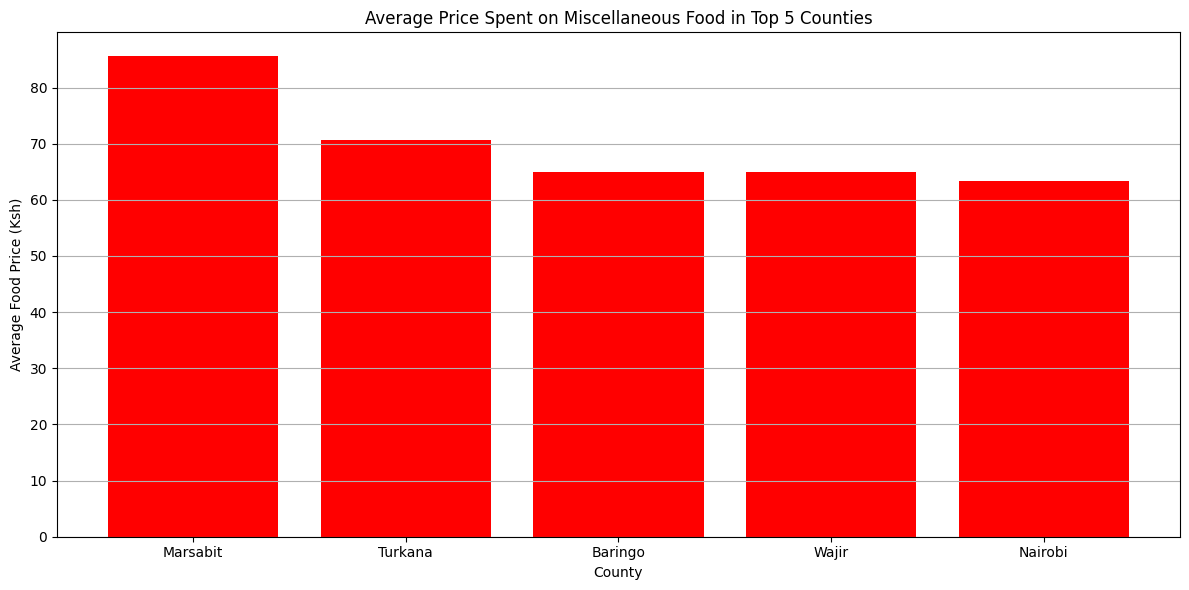

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'miscellaneous food' and the year 2022
miscellaneous_food_2022 = New_df[(New_df['category'] == 'miscellaneous food') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = miscellaneous_food_2022.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'miscellaneous food' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'miscellaneous food' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='red')
plt.title('Average Price Spent on Miscellaneous Food in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


        admin2        price
3       Kisumu  4895.688750
6      Mandera  4866.000000
8   Meru South  4587.032258
4     Machakos  4538.781250
11      Nakuru  4493.838372


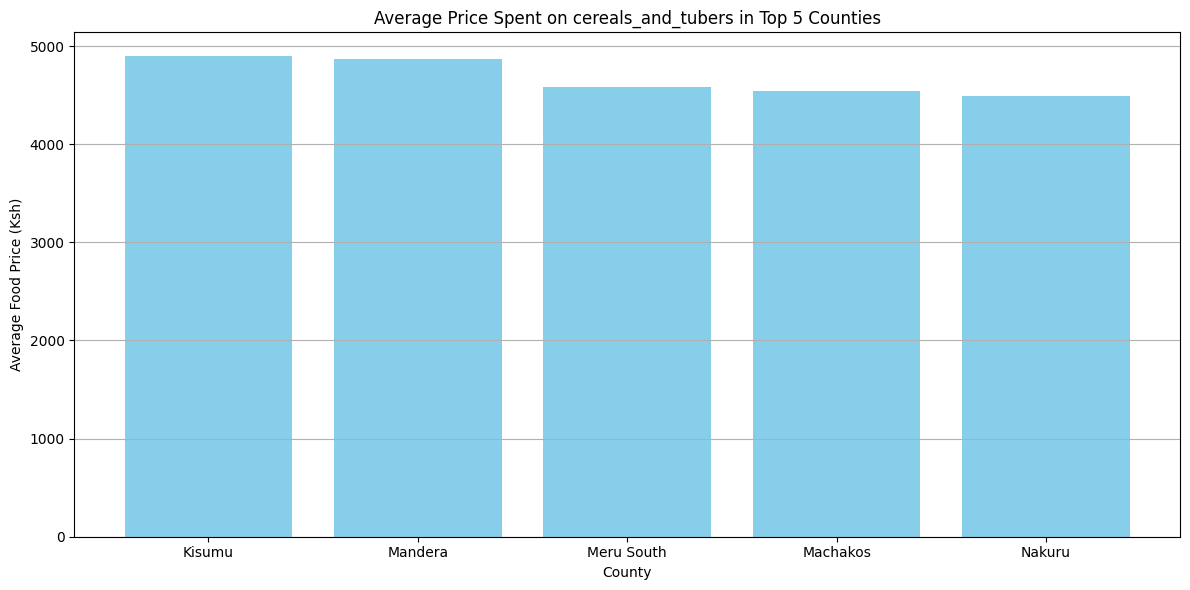

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'cereals_and_tubers' and the year 2022
cereals_and_tubers = New_df[(New_df['category'] == 'cereals and tubers') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = cereals_and_tubers.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'cereals_and_tubers' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'cereals_and_tubers' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='skyblue')
plt.title('Average Price Spent on cereals_and_tubers in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


       admin2        price
6     Mandera  4229.370000
3      Kisumu  2771.635152
8  Meru South  2476.608372
5     Makueni  2471.701379
4    Machakos  2428.845349


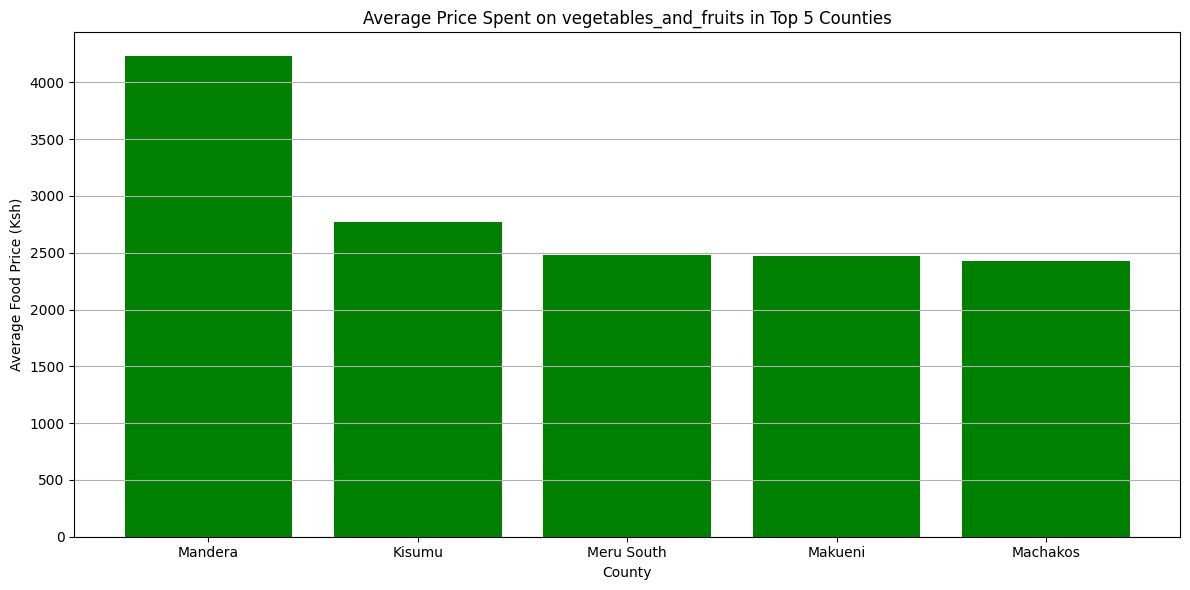

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'vegetables_and_fruits' and the year 2022
vegetables_and_fruits = New_df[(New_df['category'] == 'vegetables and fruits') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = vegetables_and_fruits.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'vegetables_and_fruits' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'vegetables_and_fruits' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='green')
plt.title('Average Price Spent on vegetables_and_fruits in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


     admin2       price
0   Baringo  560.000000
2   Nairobi  558.000000
1  Marsabit  500.000000
3   Turkana  452.691714
4     Wajir  450.000000


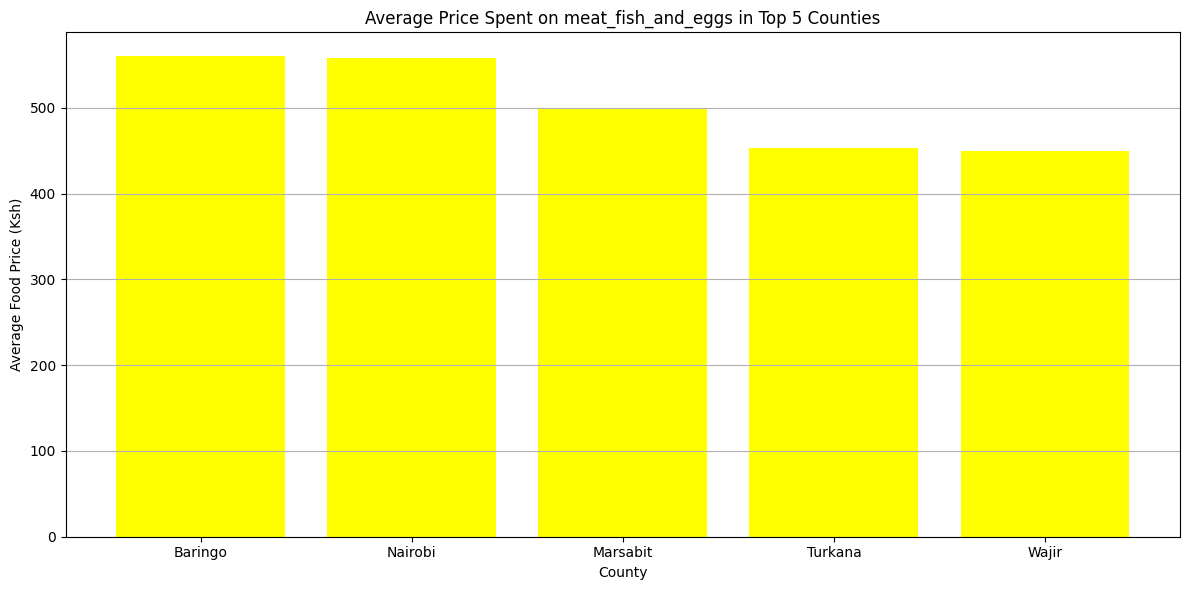

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'meat_fish_and_eggs' and the year 2022
meat_fish_and_eggs = New_df[(New_df['category'] == 'meat, fish and eggs') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = meat_fish_and_eggs.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'meat_fish_and_eggs' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'meat_fish_and_eggs' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='yellow')
plt.title('Average Price Spent on meat_fish_and_eggs in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


     admin2       price
5     Wajir  311.670000
2  Marsabit  304.840000
4   Turkana  268.433889
3   Nairobi  241.428571
0   Baringo  240.000000


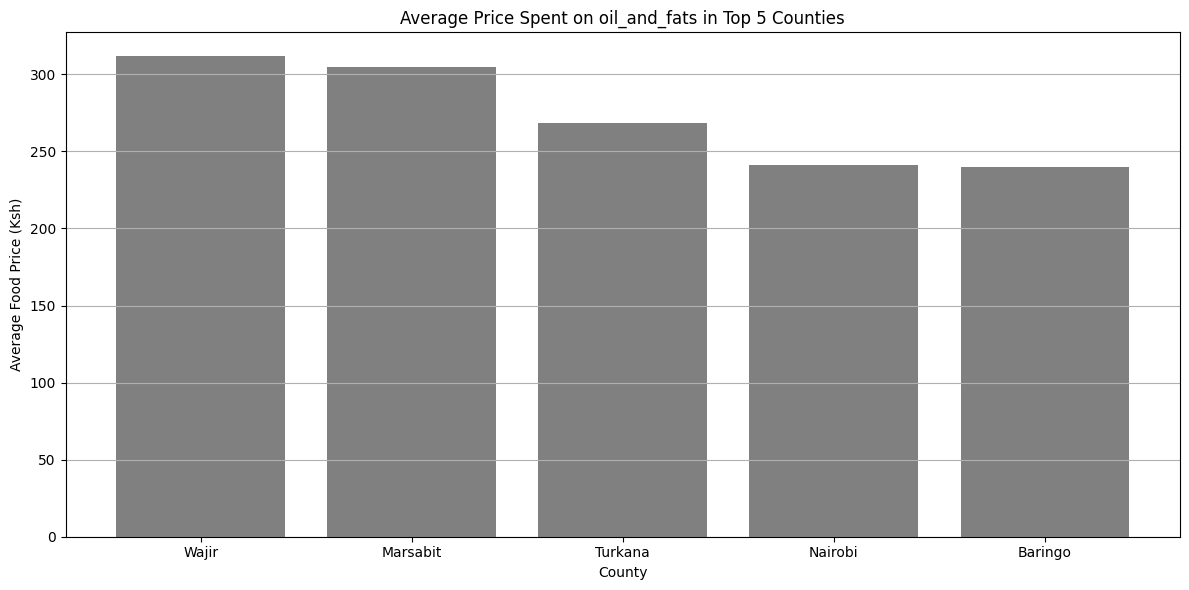

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'oil and fats' and the year 2022
oil_and_fats = New_df[(New_df['category'] == 'oil and fats') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = oil_and_fats.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'oil_and_fats' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'oil_and_fats' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='grey')
plt.title('Average Price Spent on oil_and_fats in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


     admin2      price
2  Marsabit  90.635000
4   Turkana  73.146500
0   Baringo  70.000000
5     Wajir  63.330000
3   Nairobi  53.285714


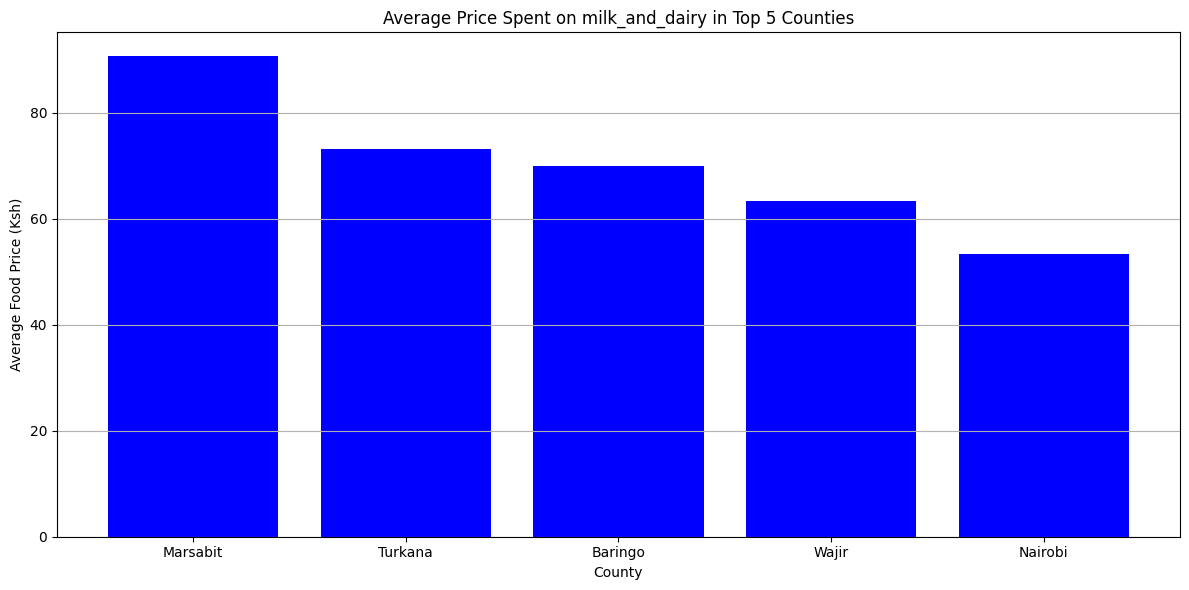

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year, month, and create new columns 'year' and 'month'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['admin2', 'year', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Filter data for the category 'milk and dairy' and the year 2022
milk_and_dairy = New_df[(New_df['category'] == 'milk and dairy') & (New_df['year'] == 2022)]

# Group data by county and calculate the average price
avg_prices_county = milk_and_dairy.groupby(['admin2'])['price'].mean().reset_index()

# Get the top 5 counties by average price spent
top_5_counties = avg_prices_county.nlargest(5, 'price')

# Print the DataFrame with average prices for 'milk_and_dairy' in top 5 counties
print(top_5_counties)

# Plotting the bar graph for average prices for 'milk_and_dairy' in top 5 counties
plt.figure(figsize=(12, 6))
plt.bar(top_5_counties['admin2'], top_5_counties['price'], color='blue')
plt.title('Average Price Spent on milk_and_dairy in Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Average Food Price (Ksh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Predicted average price for all food categories in 2023: 2391.96 Ksh
Predicted average price for all food categories in 2024: 2471.34 Ksh

Mean Squared Error on Test Set: 53846.05


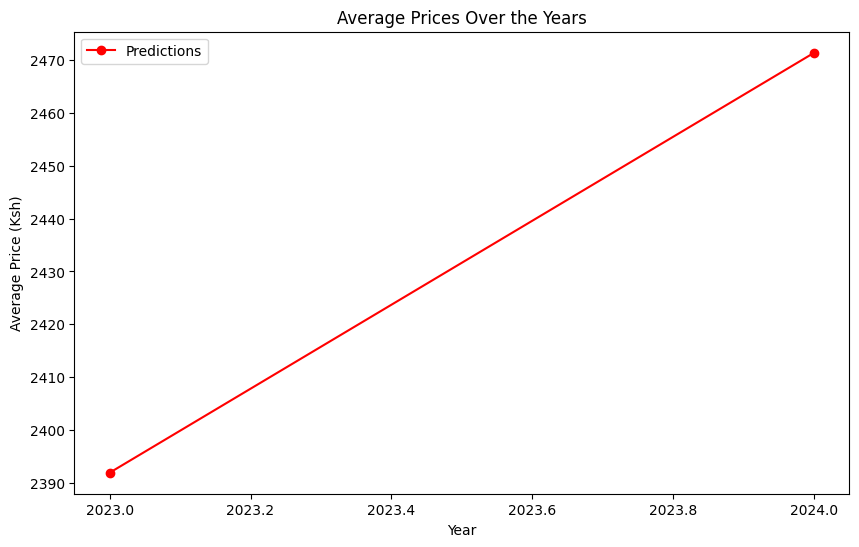

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the year and create a new column 'year'
New_df['year'] = New_df['date'].dt.year 

# Drop rows with missing values
New_df = New_df.dropna(subset=['year', 'price'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Group data by year, category, and calculate the average price
avg_prices_yearly = New_df.groupby(['year'])['price'].mean().reset_index()

# Train-test split for model evaluation
train_data, test_data = train_test_split(avg_prices_yearly, test_size=0.2, random_state=42)

# Prepare features (X) and target variable (y) for training
X_train = train_data[['year']]
y_train = train_data['price']

# Prepare features (X) and target variable (y) for testing
X_test = test_data[['year']]
y_test = test_data['price']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for 2023 and 2024
years_to_predict = [2023, 2024]
predictions = model.predict(pd.DataFrame(years_to_predict, columns=['year']))

# Print the predictions for 2023 and 2024
for year, prediction in zip(years_to_predict, predictions):
    print(f"Predicted average price for all food categories in {year}: {prediction:.2f} Ksh")

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse:.2f}")

# Plotting the predictions
plt.figure(figsize=(10, 6))

plt.plot(years_to_predict, predictions, 'ro-', label='Predictions')
plt.title('Average Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price (Ksh)')
plt.legend()
plt.show()


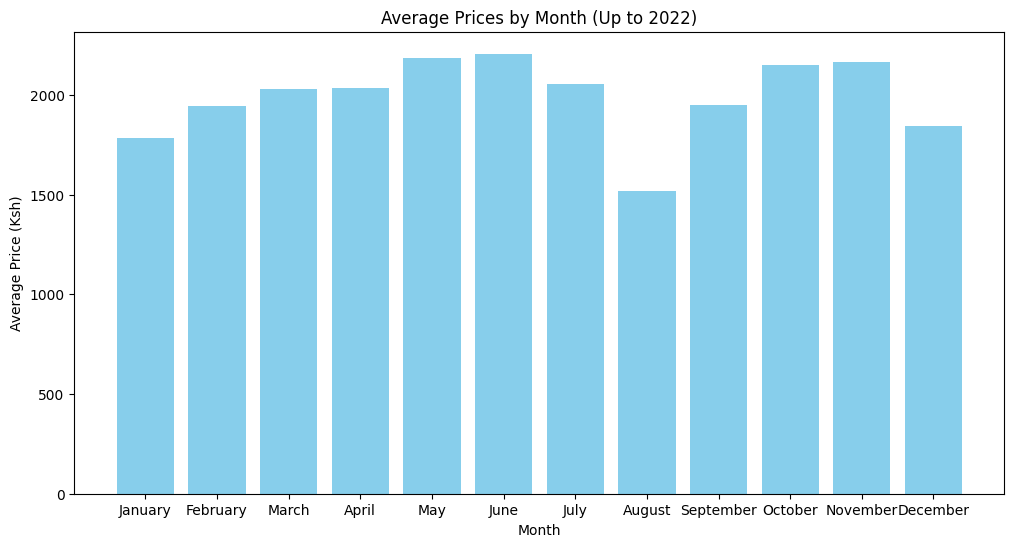

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the month and create a new column 'month'
New_df['month'] = New_df['date'].dt.month_name()

# Drop rows with missing values
New_df = New_df.dropna(subset=['month', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Group data by month and calculate the average price
avg_prices_monthly = New_df.groupby(['month'])['price'].mean().reset_index()

# Sort months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_prices_monthly['month'] = pd.Categorical(avg_prices_monthly['month'], categories=month_order, ordered=True)
avg_prices_monthly = avg_prices_monthly.sort_values('month')

# Plotting the average prices by month
plt.figure(figsize=(12, 6))
plt.bar(avg_prices_monthly['month'], avg_prices_monthly['price'], color='skyblue')
plt.title('Average Prices by Month (Up to 2022)')
plt.xlabel('Month')
plt.ylabel('Average Price (Ksh)')
plt.show()


        month        price
6        June  2206.600405
8         May  2186.115964
9    November  2163.292313
10    October  2150.070621
5        July  2055.656682
0       April  2033.037966
7       March  2032.111763
11  September  1947.513829
3    February  1946.895804
2    December  1842.545830
4     January  1783.999063
1      August  1517.716948


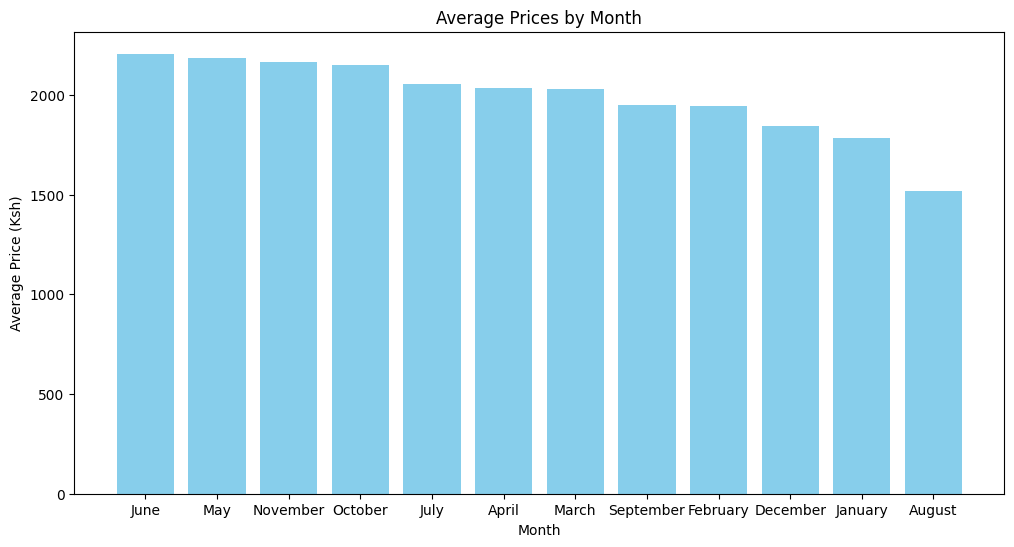

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'New_df'
# Ensure 'date' column is in datetime format
New_df['date'] = pd.to_datetime(New_df['date'])

# Extract the month and create a new column 'month'
New_df['month'] = New_df['date'].dt.month_name()

# Drop rows with missing values
New_df = New_df.dropna(subset=['month', 'price', 'category'])

# Convert 'price' column to numeric, handling errors by setting non-convertible values to NaN
New_df['price'] = pd.to_numeric(New_df['price'], errors='coerce')

# Group data by month and calculate the average price
avg_prices_monthly = New_df.groupby(['month'])['price'].mean().reset_index()

# Sort months by average price in descending order
avg_prices_monthly = avg_prices_monthly.sort_values('price', ascending=False)

#plotting  a table
print(avg_prices_monthly)

# Plotting the average prices by month
plt.figure(figsize=(12, 6))
plt.bar(avg_prices_monthly['month'], avg_prices_monthly['price'], color='skyblue')
plt.title('Average Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (Ksh)')
plt.show()
